
# Data Analysis - Sotheby's Auctions

### _A Web Scraping Project_










#### **Deborah Leong**

## Background

Founded in 1744, [Sotheby’s](https://www.sothebys.com/ "Sotheby's Homepage") is the oldest and largest internationally recognised firm of fine art auctioneers in the world. It has a global network of 80 offices and the company’s annual worldwide sales turnover is currently in excess of $4 billion.

The art industry and its auction market has been one of the most opaque markets in the world. In the following web scraping project, we aim to collect recent auction results from Sotheby's auction website for some insights on the latest happening in the industry.

_The auction page on Sotheby's website is organized by "Department". In this project we will be analyzing contemporary art and impressionist & modern art._


## Questions

* Who are the top represented artists by sales count and revenue?
* Are number of bids or auctioneer estimates correlated with final auction sales?
* Are there seasonal trends in the sales volume and prices?

## Web Scraping - _Selenium_

The auction home page contains a summary of auctions in reverse chronological order. As it's relatively more challenging to compare different types collecions across culture: aboriginal, oriental, western or across department: jewelry, watches, we have limited our scope to `Contemporary Art` and `Impressionist & Modern Art` in this project. The auction page presents itself with infinite scrolling, as such we'll be utilizing a combination of [Selenium](www.selenium.dev) and [ChromeDriver](https://chromedriver.chromium.org/) as our tools. 

**General Approach**
1. Navigate to target URL with *Chromedriver*
2. Write a *Scroll* function takes us to the bottom of the page
3. Save the URLs to each auction by accessing their [Xpath](https://docs.scrapy.org/en/xpath-tutorial/topics/xpath-tutorial.html)

**For each Auction Page**
* *Repeat* the above process
* Save details of each auction item into a dictionary
* Write to CSV

_Below are extracts of the sample code_

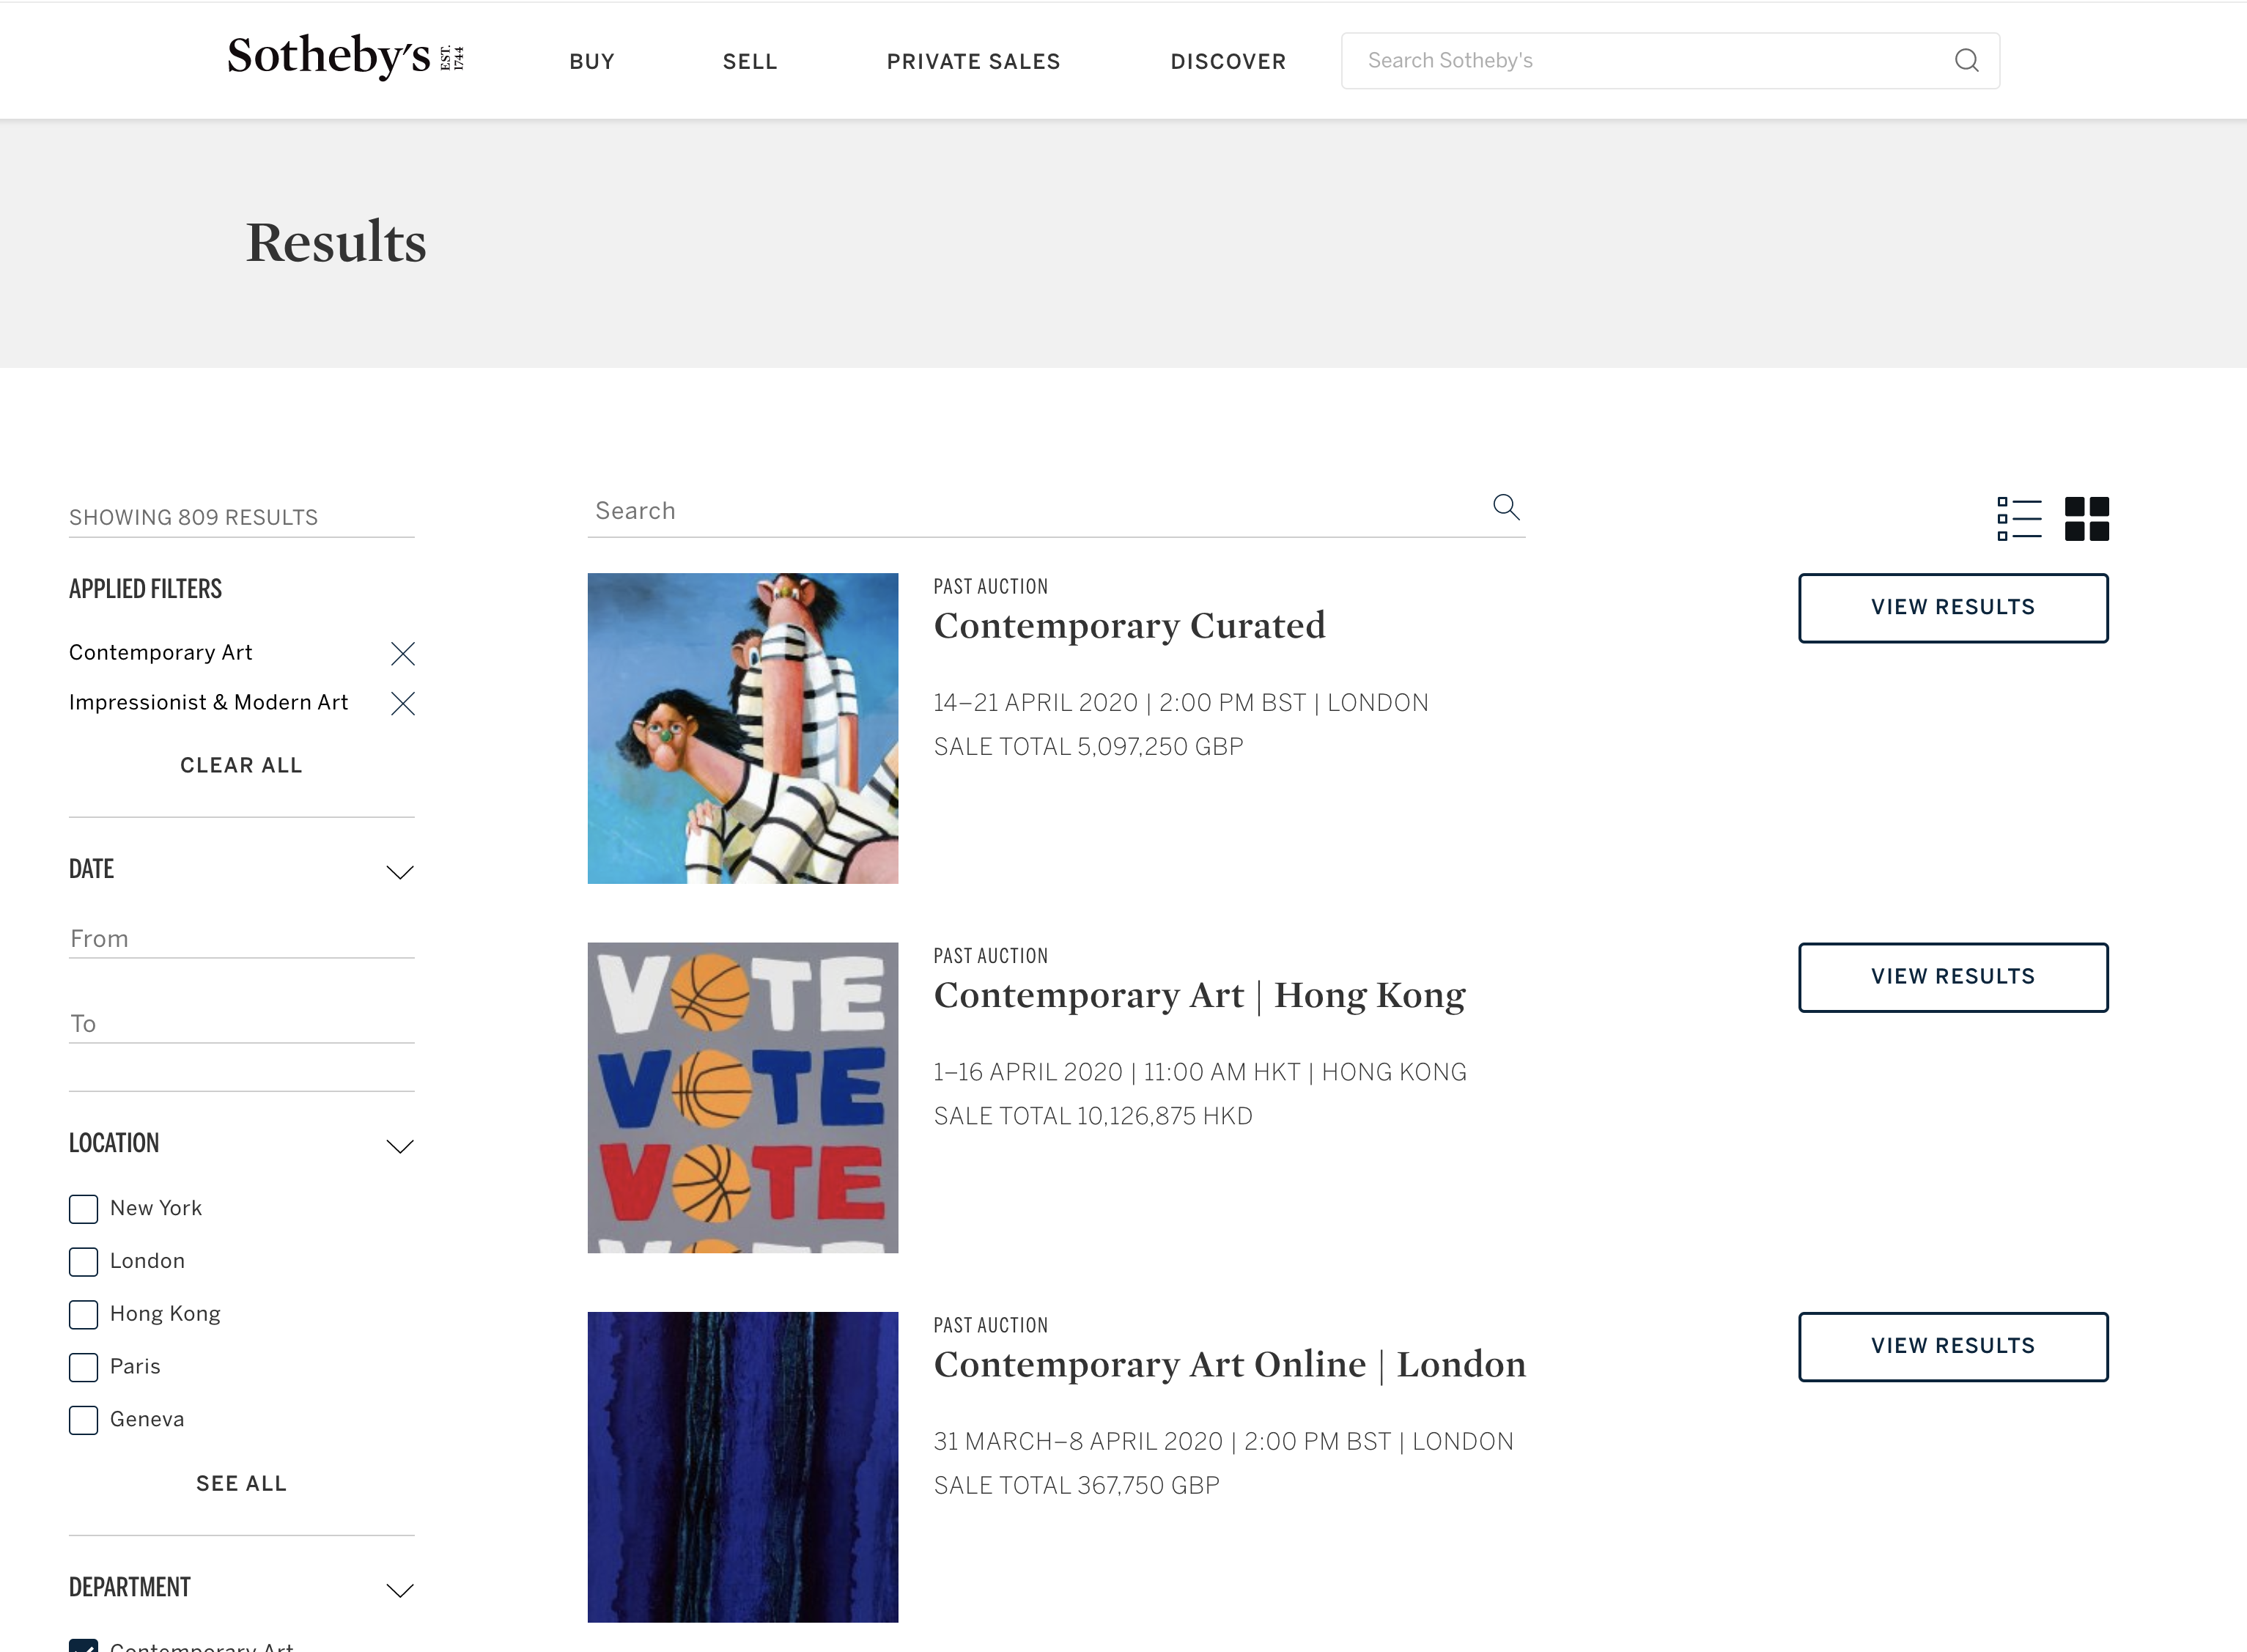

In [1]:
from IPython.display import Image
Image(filename='./auction_list.png')

# Below is a snapshot of the auctions page

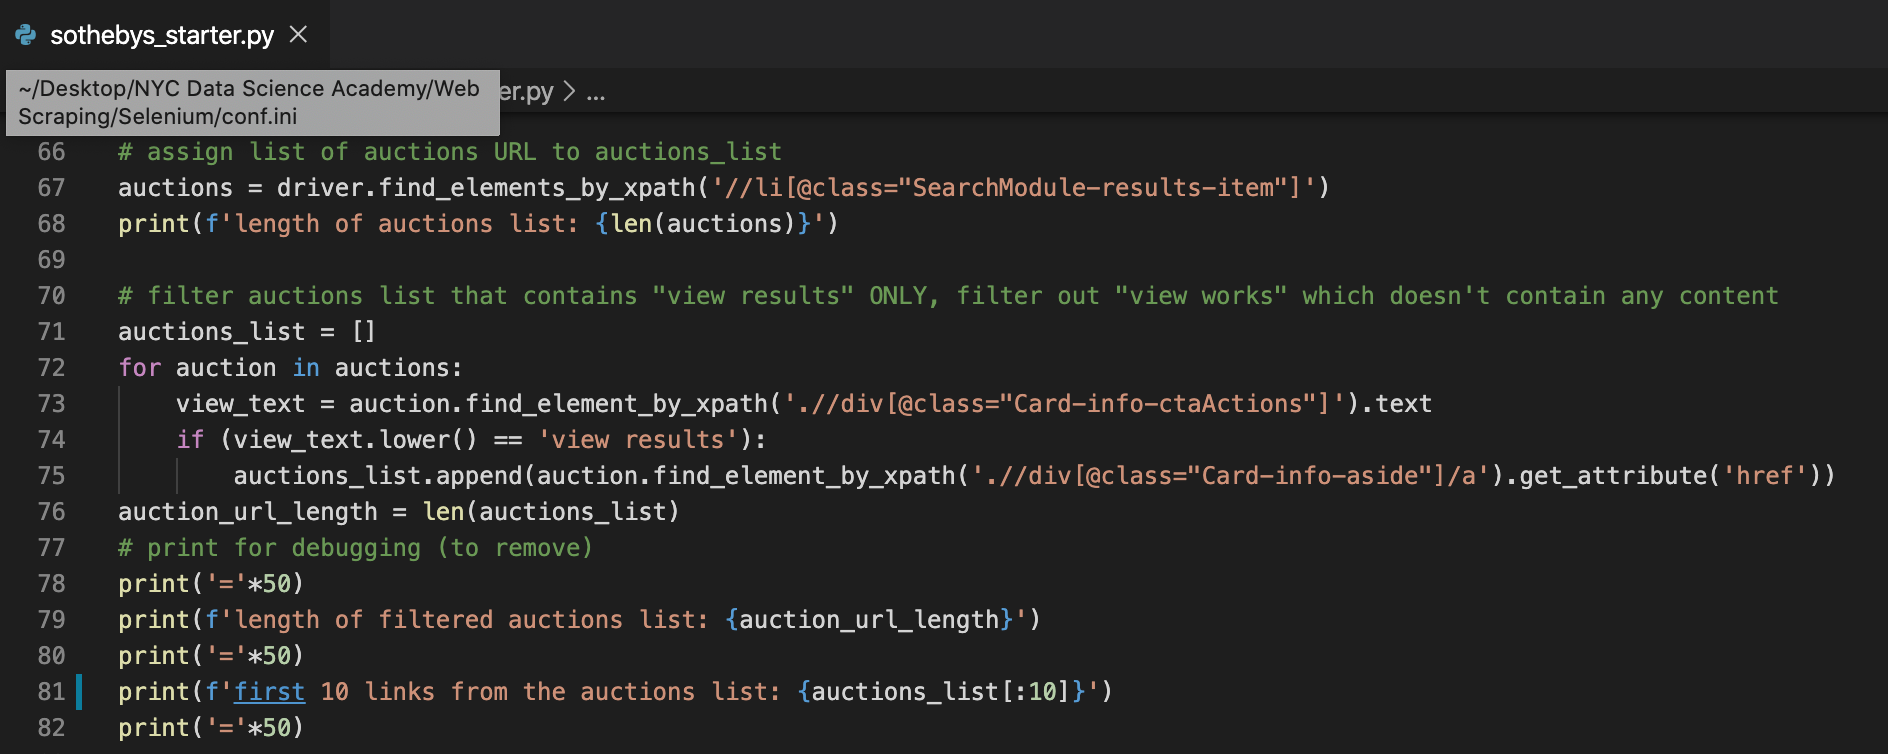

In [2]:
Image(filename='./auction_list_code.png') 

#Below is a snapshot of the code which iterates through the list of auctions and save the URLs to a list

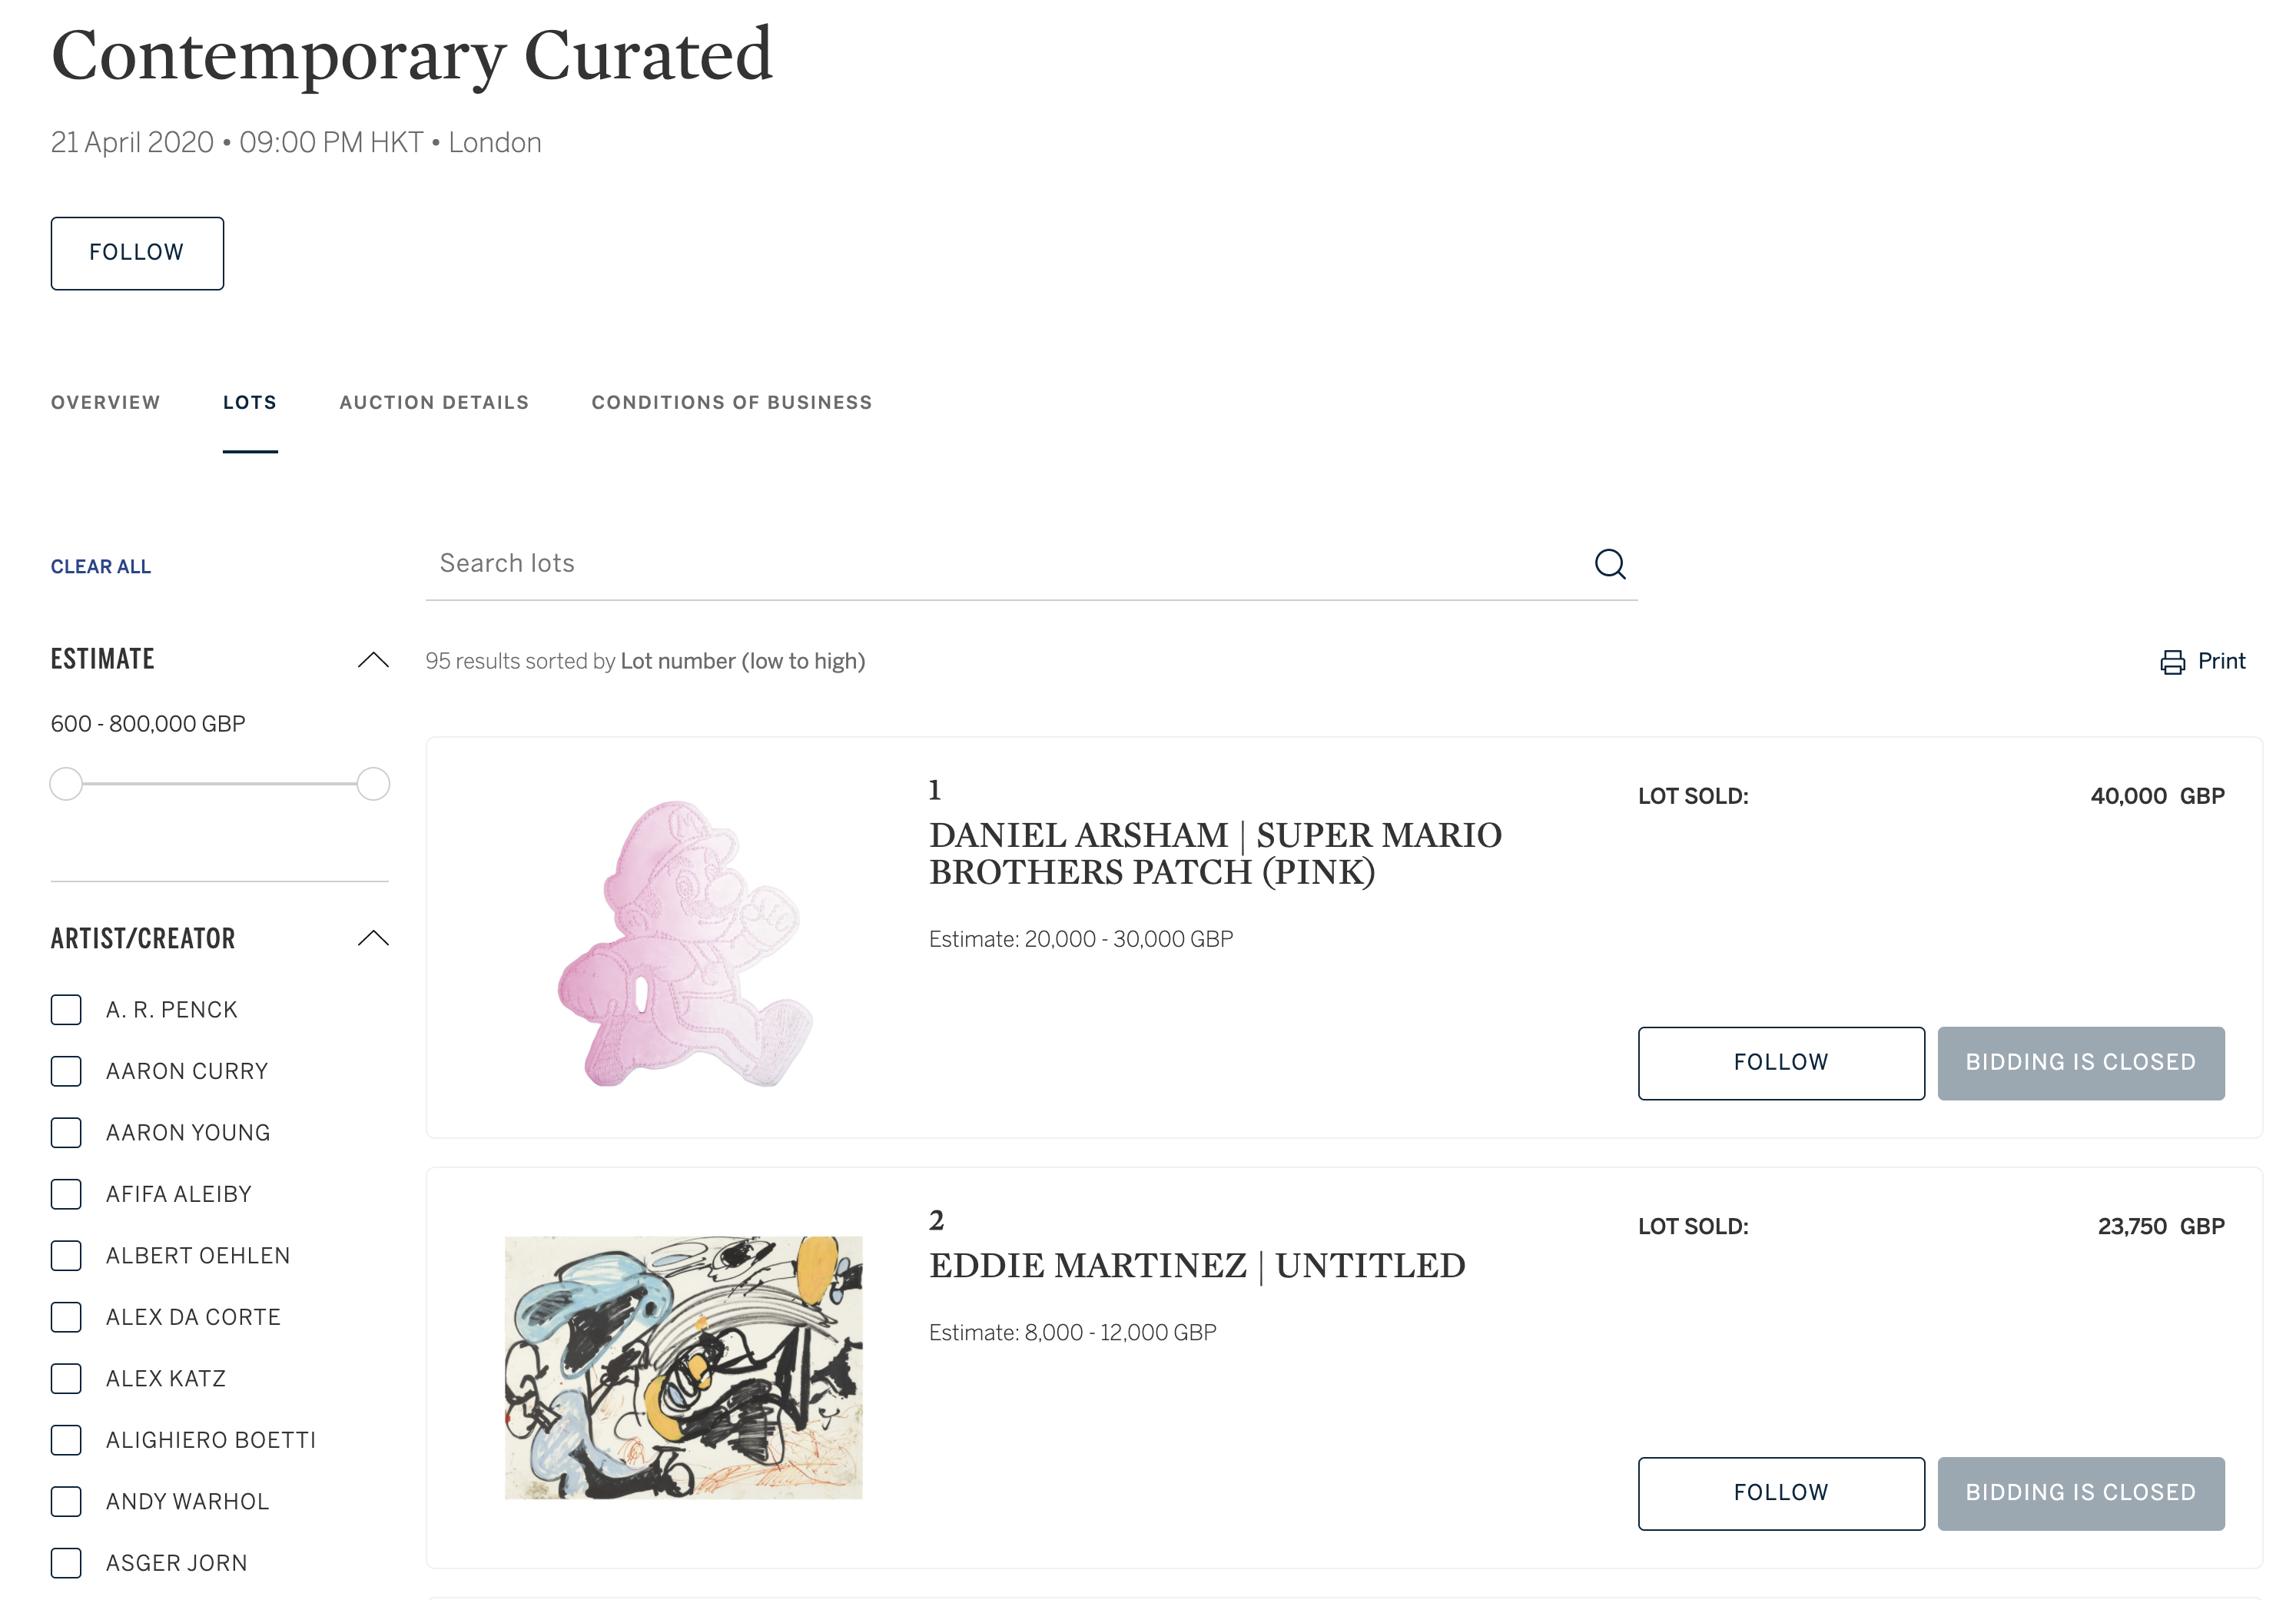

In [3]:
Image(filename='./auction_items.png')

# Below is a snapshot of the auction "Contemporary Curated", which shows the list of auction items

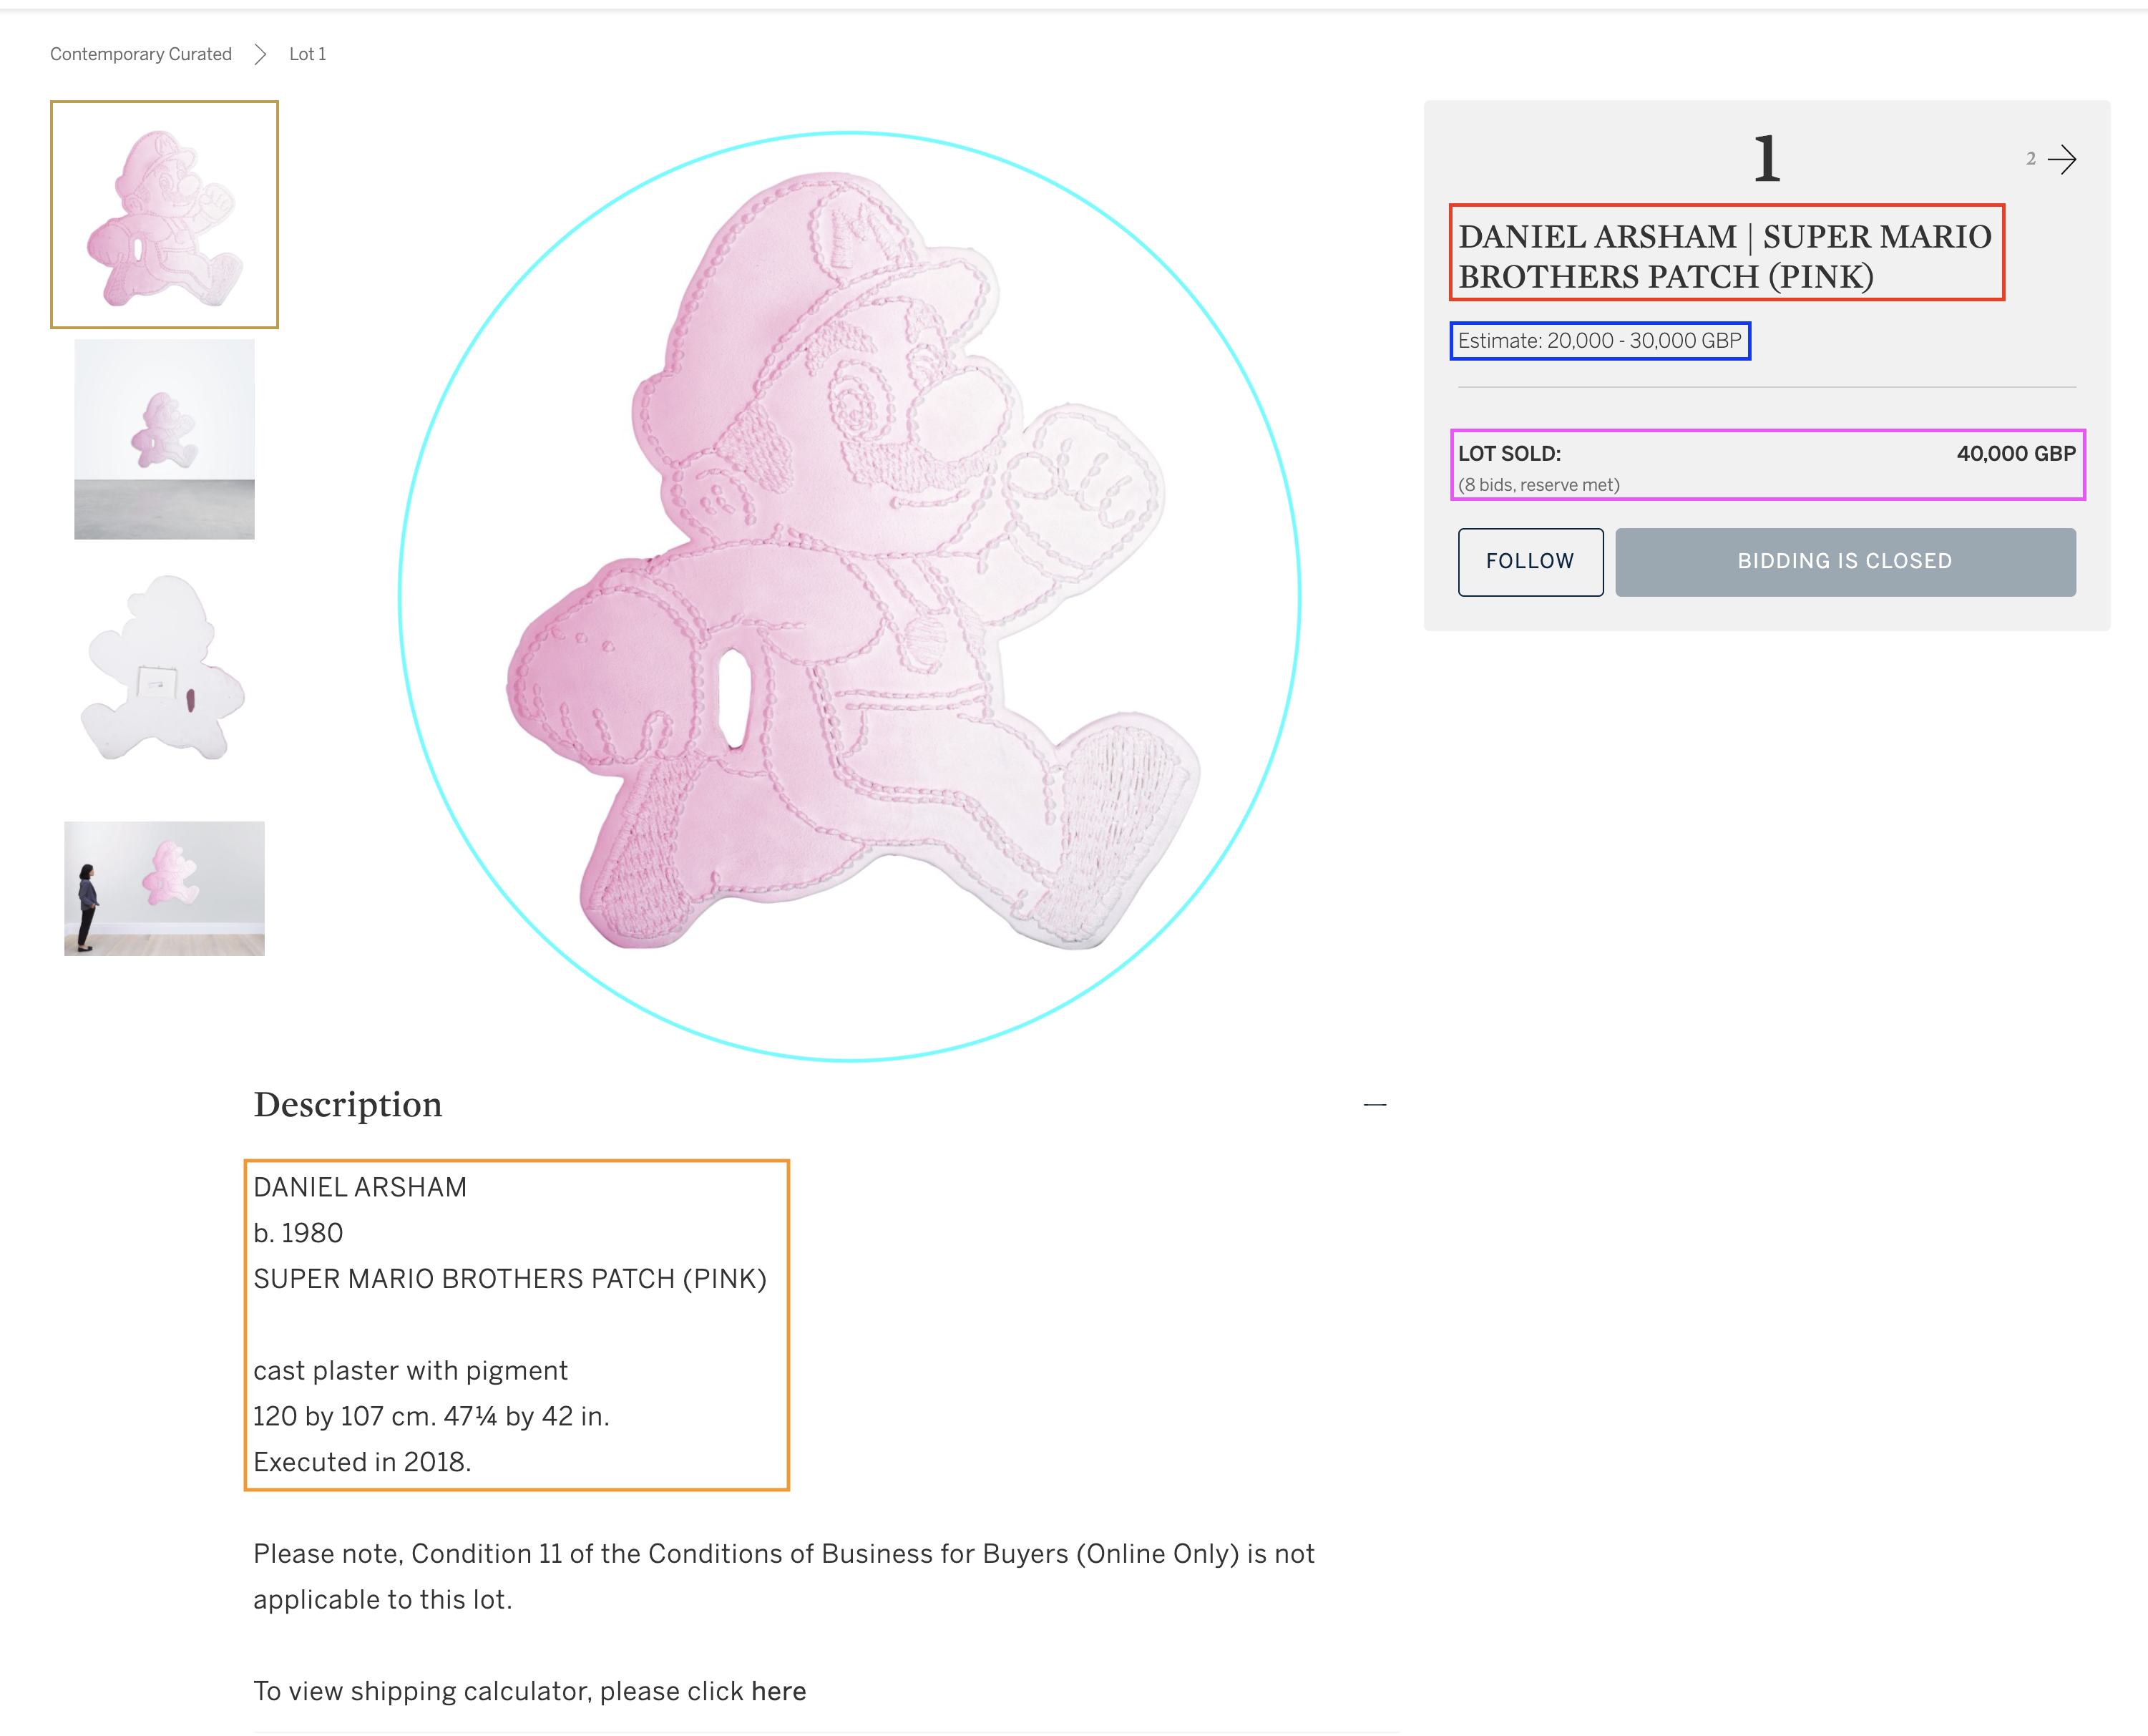

In [4]:
Image(filename='./auction_item.png')

#Below is a snapshot of the auction item URL, note the Xpath elements being extracted from the page

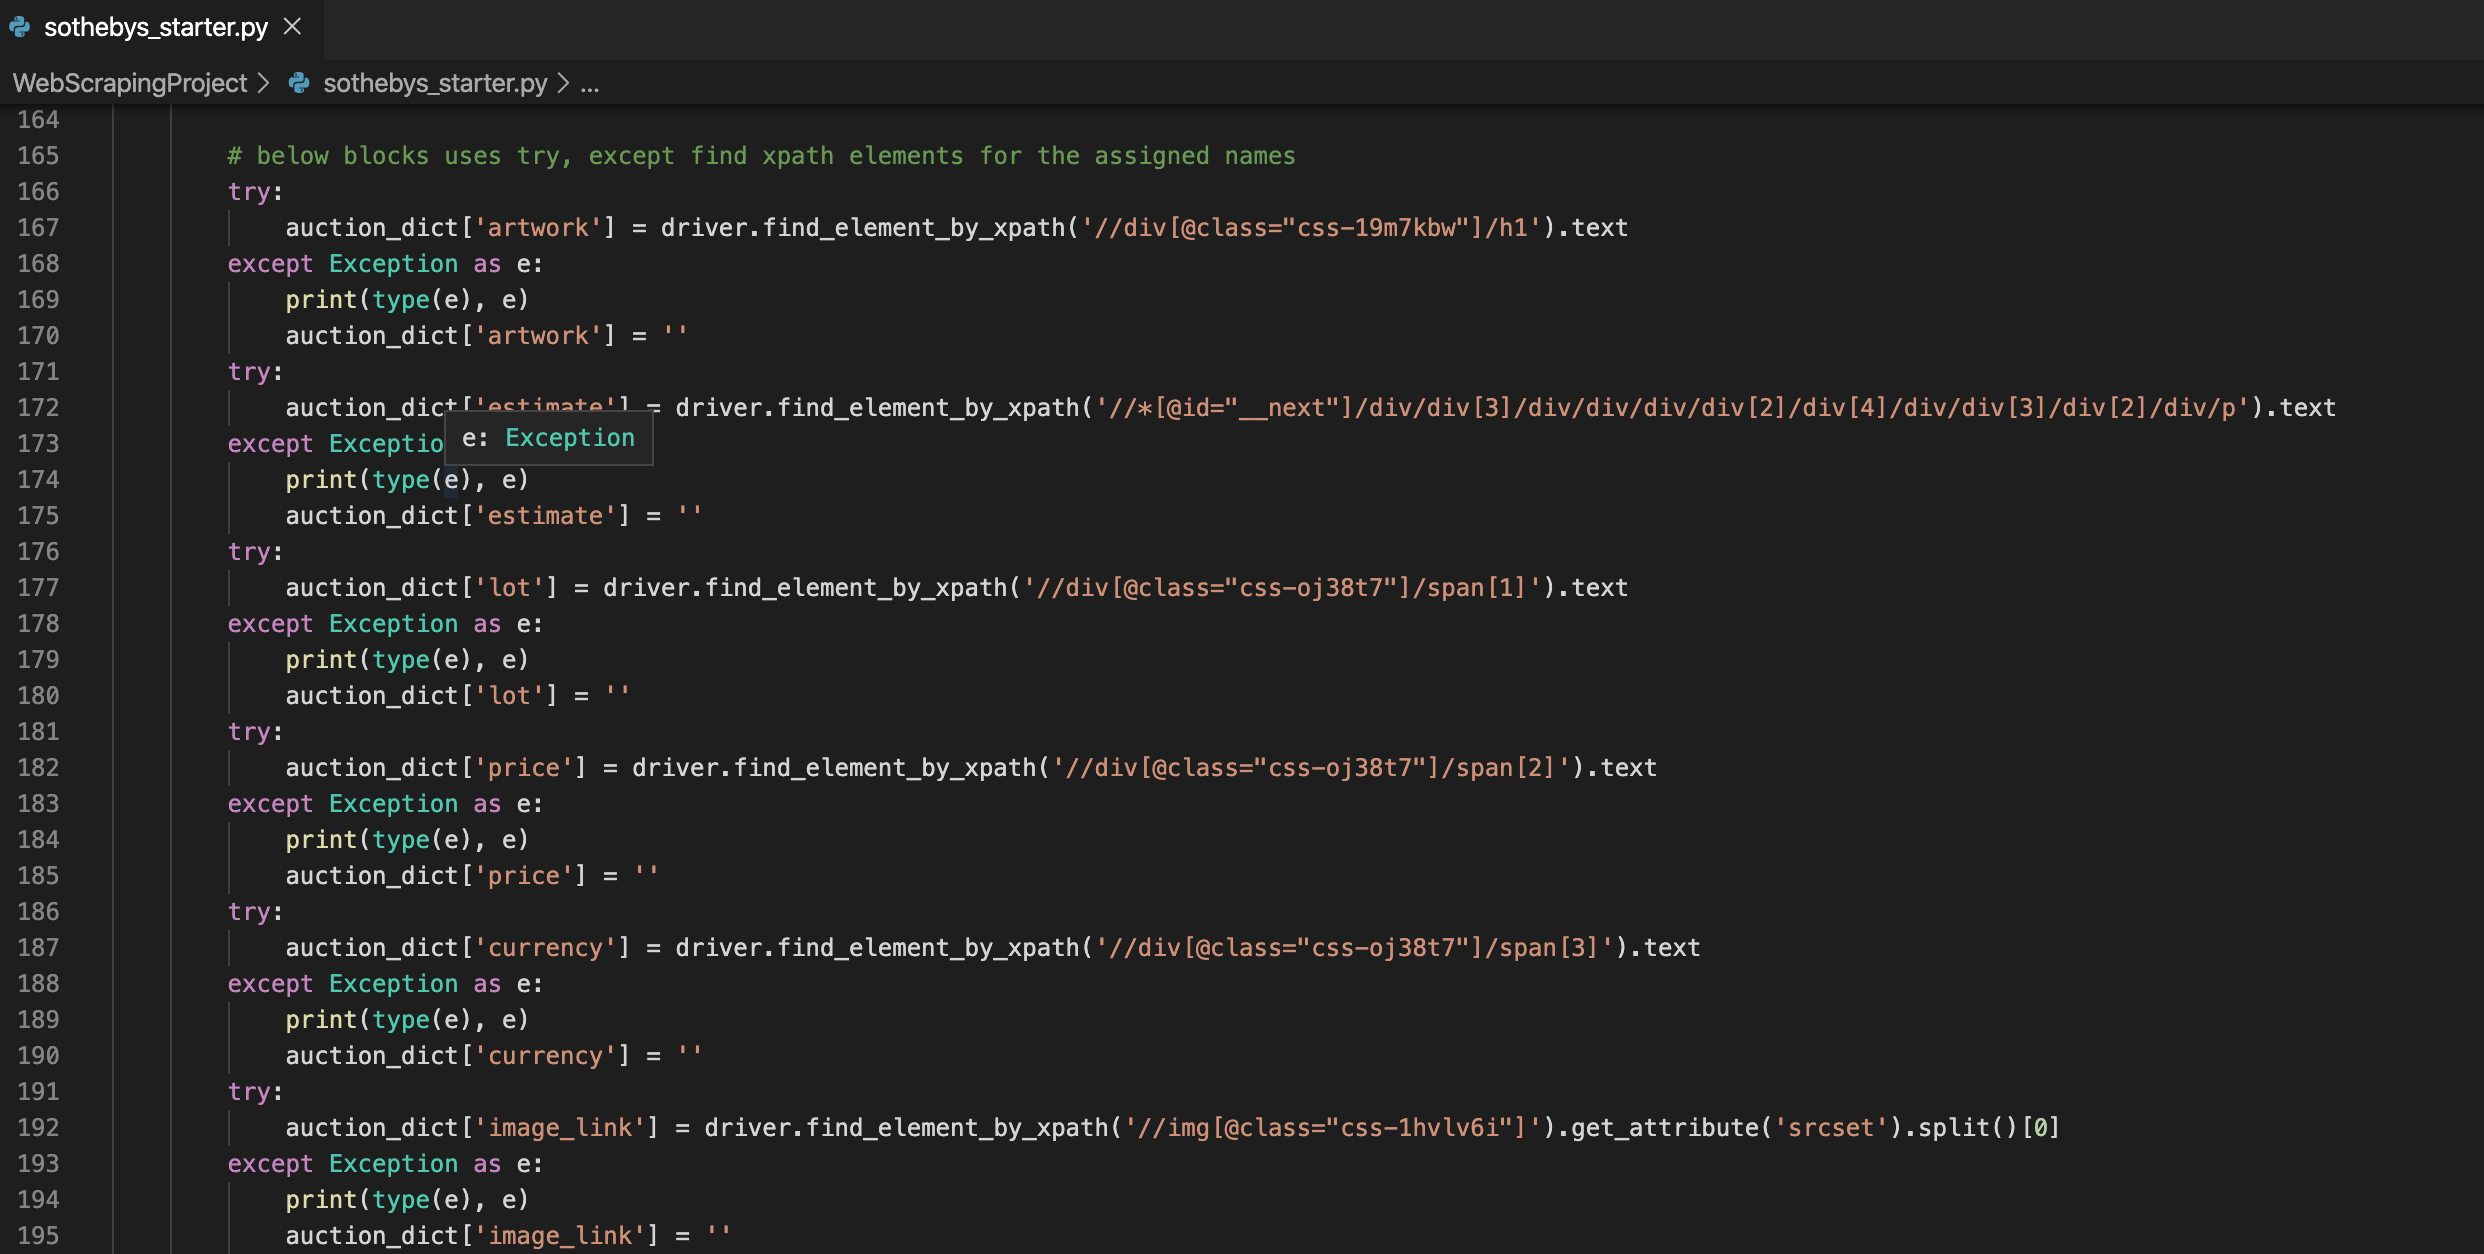

In [5]:
Image(filename='./auction_items_code.png') 

# Below is a snapshot of the sample code which extracts text by accessing their Xpaths

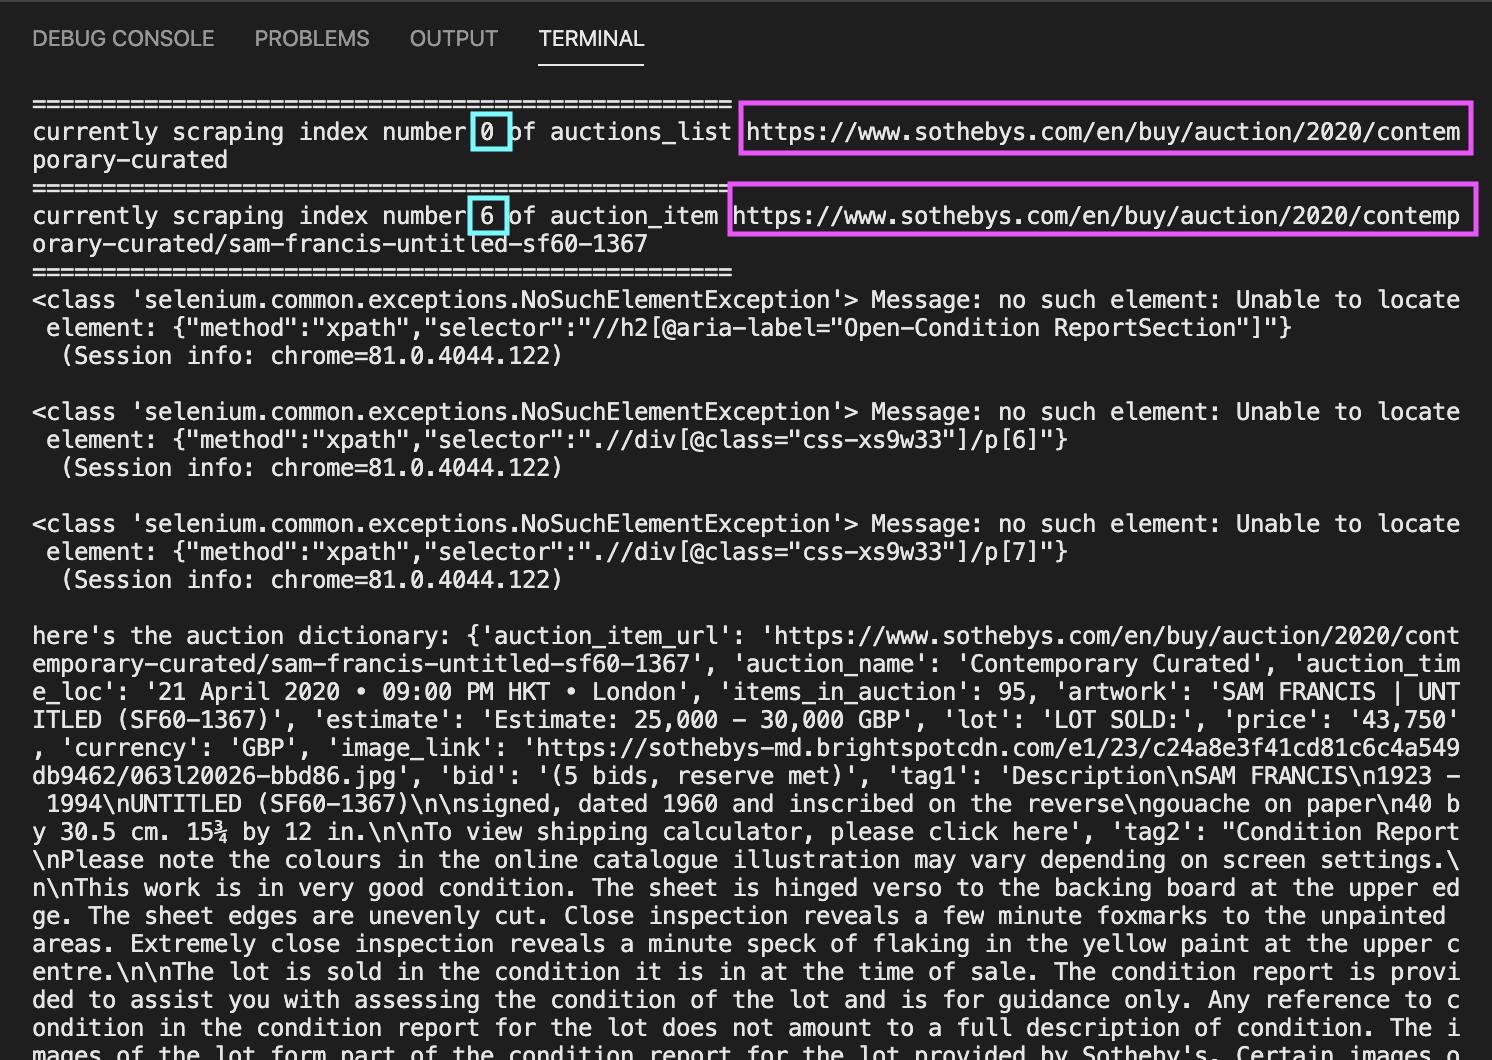

In [6]:
Image(filename='./console_log.png')

# Below is a snapshot of the print statements added along the code to show with debugging
# In the scraping process, I came across a couple of times where the scraper stops automatically with a "server not rendering" error
# I've added the index numbers as part of the print to console so that I can simply rerun the scraper starting from where the previous trial left off

## Future Work

Auction pages dated 2017 prior has a different layout so has not been included in this project.

**If given more time...**

1. I'd like to scrape at least **10 years of data** which hopefully provides better representation of artists, changes in demands and trends, genres, etc.

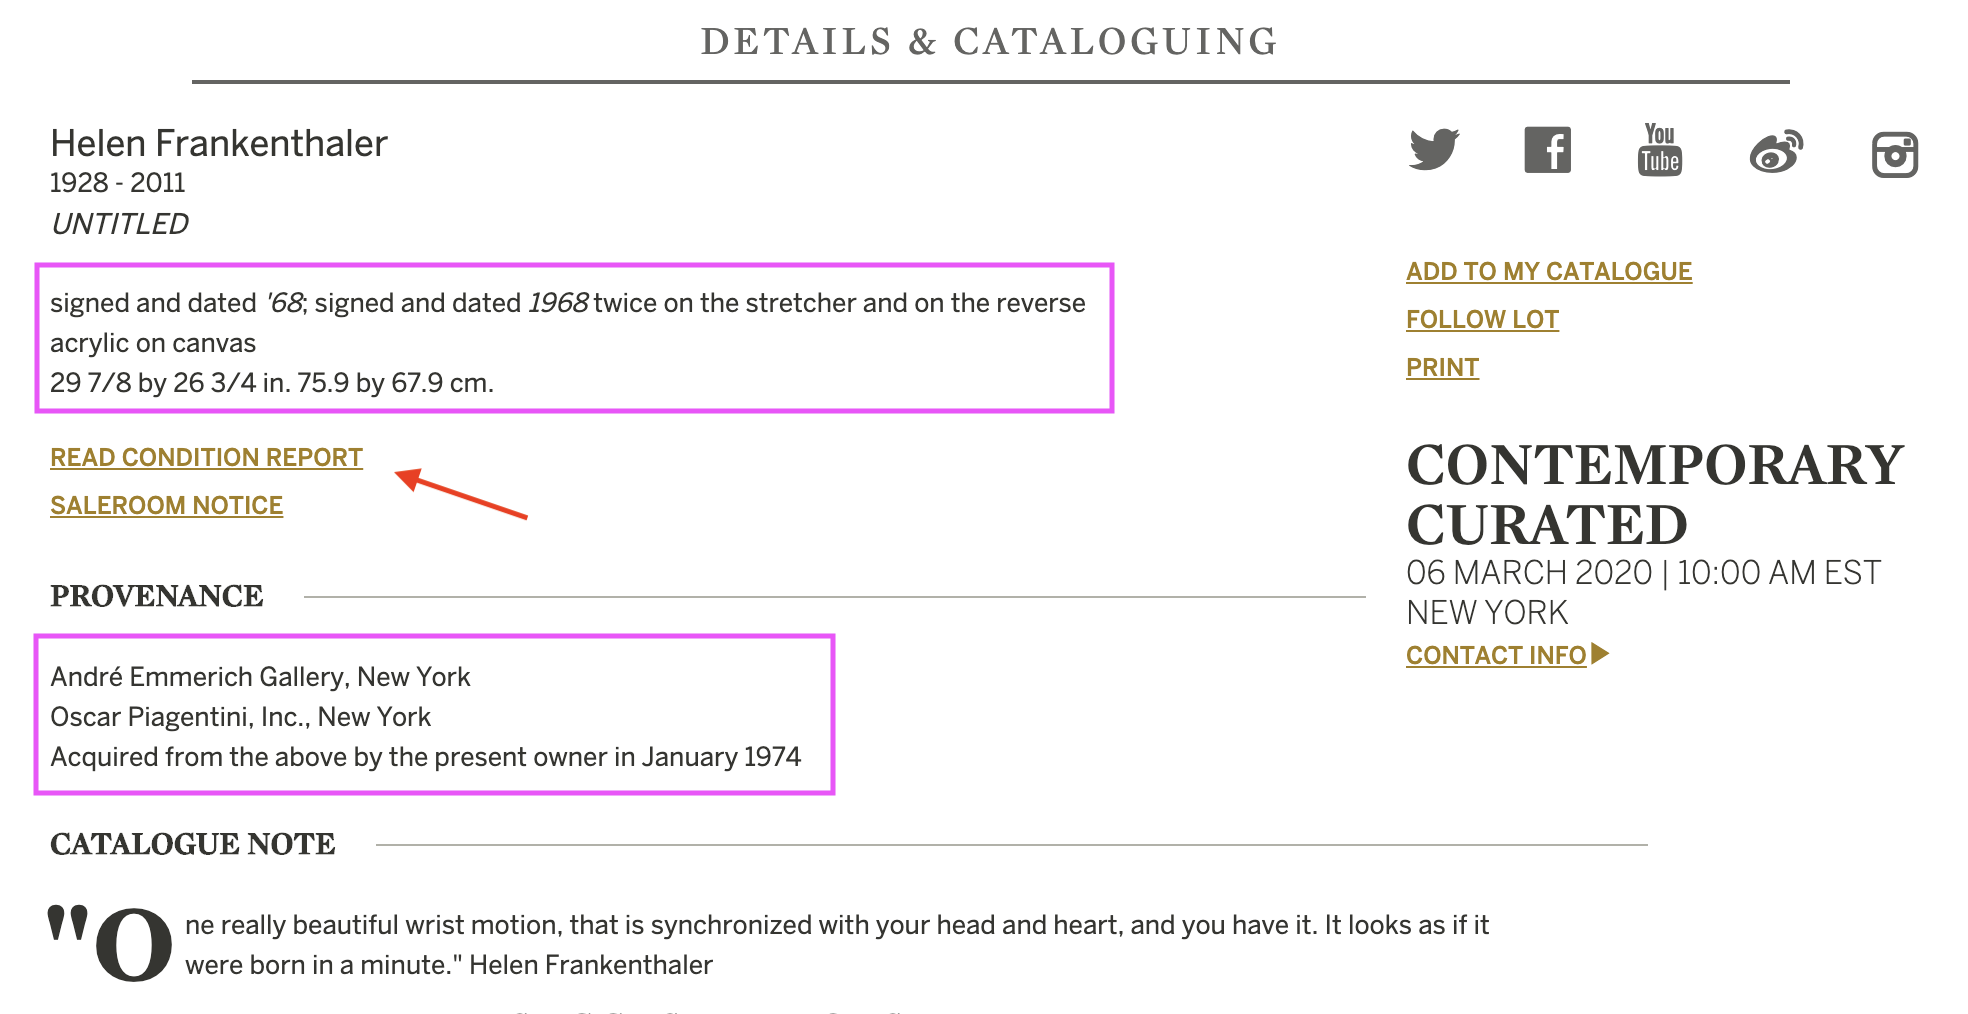

In [7]:
Image(filename='./Helen_Frankenthaler.png')

In addition, the project scope was limited by the format texts gets embedded in Xpath elements in the URL.

**If given more time...**

2. If given more time, I'd like to work on extracting information like signage, material, size, conditions, provenance, etc. potentially using NLP models like **[Spacy](https://spacy.io/usage/training)**.

3. Lastly I've saved the URLs to all these beautiful art pieces and would like to work on **quantifying "taste" of art**

## Breakdown of the Process

#### 1.    Data Exploration
#### 2.    Data Cleaning
    - DateTime (timezone conversion)
    - Currencies (currency conversion)
    - Artist Name (remove foreign charaters)
#### 3.    Data Analysis
#### 4.    Data Visualization



In [8]:
import pandas as pd
import numpy as np

auctions_original = pd.read_csv('sothebys_cleaned_all.csv', index_col=[0], parse_dates=True)
auctions_original = auctions_original.loc[:, ~auctions_original.columns.str.match('Unnamed')]
auctions = auctions_original.copy()

# clean data columns
def clean_col(col):
    col = col.strip()
    col = col.replace("(","")
    col = col.replace(")","")
    col = col.lower()
    return col

new_columns = []
for c in auctions.columns:
    clean_c = clean_col(c)
    new_columns.append(clean_c)

auctions.columns = new_columns

# we assume that null values in columns "num_bids" and "prices" represent unsold auction piece
# drop rows with null values to reduce noise in our data
auctions= auctions.dropna(axis=0, subset=['artwork_title_1','num_bids','price'])

# we'll also drop the artwork_title_2 - 4 as it doesn't seem to provide much information for our analysis
to_drop = ['artwork_title_2','artwork_title_3','artwork_title_4']
auctions.drop(to_drop, inplace=True, axis=1)

# explore cleaned columns dataframe
auctions.info()
auctions.head(2)
# auctions.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 1651 entries, https://www.sothebys.com/en/buy/auction/2020/contemporary-curated/daniel-arsham-super-mario-brothers-patch-pink to https://www.sothebys.com/en/buy/auction/2018/contemporary-art-online-jan-schoonhoven/e28704b6-8818-44cf-8983-86c99ce34700
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   auction_name       1651 non-null   object
 1   auction_date_time  1651 non-null   object
 2   auction_city       1651 non-null   object
 3   items_in_auction   1651 non-null   int64 
 4   artwork_artist     1651 non-null   object
 5   artwork_title_1    1651 non-null   object
 6   estimate_low       1651 non-null   int64 
 7   estimate_high      1651 non-null   object
 8   estimate_ccy       1651 non-null   object
 9   lot                1651 non-null   object
 10  price              1651 non-null   object
 11  currency           1651 non-null   object
 12  num_bids

auction_name  \
auction_item_url                                                           
https://www.sothebys.com/en/buy/auction/2020/co...  Contemporary Curated   
https://www.sothebys.com/en/buy/auction/2020/co...  Contemporary Curated   

                                                   auction_date_time  \
auction_item_url                                                       
https://www.sothebys.com/en/buy/auction/2020/co...    04/21/20 21:00   
https://www.sothebys.com/en/buy/auction/2020/co...    04/21/20 21:00   

                                                   auction_city  \
auction_item_url                                                  
https://www.sothebys.com/en/buy/auction/2020/co...       London   
https://www.sothebys.com/en/buy/auction/2020/co...       London   

                                                    items_in_auction  \
auction_item_url                                                       
https://www.sothebys.com/en/buy/auction/2020/co...                95   
https://www.sothebys.com/en/buy/auction/2020/co...                95   

                                                     artwork_artist  \
auction_item_url                                                      
https://www.sothebys.com/en/buy/auction/2020/co...   DANIEL ARSHAM    
https://www.sothebys.com/en/buy/auction/2020/co...  EDDIE MARTINEZ    

                                                                       artwork_title_1  \
auction_item_url                                                                         
https://www.sothebys.com/en/buy/auction/2020/co...   SUPER MARIO BROTHERS PATCH (PINK)   
https://www.sothebys.com/en/buy/auction/2020/co...                            UNTITLED   

                                                    estimate_low  \
auction_item_url                                                   
https://www.sothebys.com/en/buy/auction/2020/co...         20000   
https://www.sothebys.com/en/buy/auction/2020/co...          8000   

                                                   estimate_high estimate_ccy  \
auction_item_url                                                                
https://www.sothebys.com/en/buy/auction/2020/co...       30,000           GBP   
https://www.sothebys.com/en/buy/auction/2020/co...       12,000           GBP   

                                                          lot   price  \
auction_item_url                                                        
https://www.sothebys.com/en/buy/auction/2020/co...  LOT SOLD:  40,000   
https://www.sothebys.com/en/buy/auction/2020/co...  LOT SOLD:  23,750   

                                                   currency num_bids  \
auction_item_url                                                       
https://www.sothebys.com/en/buy/auction/2020/co...      GBP       8    
https://www.sothebys.com/en/buy/auction/2020/co...      GBP      14    

                                                   reserve_met  \
auction_item_url                                                 
https://www.sothebys.com/en/buy/auction/2020/co...         met   
https://www.sothebys.com/en/buy/auction/2020/co...         met   

                                                                                                 tag1  \
auction_item_url                                                                                        
https://www.sothebys.com/en/buy/auction/2020/co...  Description\nDANIEL ARSHAM\nb. 1980\nSUPER MAR...   
https://www.sothebys.com/en/buy/auction/2020/co...  Description\nEDDIE MARTINEZ\nb. 1977\nUNTITLED...   

                                                                                                 tag2  \
auction_item_url                                                                                        
https://www.sothebys.com/en/buy/auction/2020/co...  Condition Report\nPlease note the colours in t...   
https://www.sothebys.com/en/buy/auction/2020/co...  Condition Report\nPlease note

Next, we set out to explore how different factors affecting auction prices and have decided to drop the rows in columns `price`, `num_bids` and `artwork_title_1`, which probably represents auction sales which had not happened. This leaves us with 1,651 rows for further analysis.

From observation, the columns `estimate_low`, `estimate_high` and `price` represents prices, we will convert them to dtype `float` below.

In [9]:
# convert numerical values to float and int for future computation
auctions["estimate_low"] = auctions["estimate_low"].astype(float)
auctions["estimate_high"] = auctions["estimate_high"].astype(str).str.replace(',','').astype(float)
auctions["price"] = auctions["price"].astype(str).str.replace(',','').astype(float)
auctions["num_bids"] = auctions["num_bids"].str.replace(' bid',"").astype(int)

auctions.info()
auctions.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 1651 entries, https://www.sothebys.com/en/buy/auction/2020/contemporary-curated/daniel-arsham-super-mario-brothers-patch-pink to https://www.sothebys.com/en/buy/auction/2018/contemporary-art-online-jan-schoonhoven/e28704b6-8818-44cf-8983-86c99ce34700
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   auction_name       1651 non-null   object 
 1   auction_date_time  1651 non-null   object 
 2   auction_city       1651 non-null   object 
 3   items_in_auction   1651 non-null   int64  
 4   artwork_artist     1651 non-null   object 
 5   artwork_title_1    1651 non-null   object 
 6   estimate_low       1651 non-null   float64
 7   estimate_high      1651 non-null   float64
 8   estimate_ccy       1651 non-null   object 
 9   lot                1651 non-null   object 
 10  price              1651 non-null   float64
 11  currency           1651 non-null   object 

auction_name  \
auction_item_url                                                           
https://www.sothebys.com/en/buy/auction/2020/co...  Contemporary Curated   
https://www.sothebys.com/en/buy/auction/2020/co...  Contemporary Curated   

                                                   auction_date_time  \
auction_item_url                                                       
https://www.sothebys.com/en/buy/auction/2020/co...    04/21/20 21:00   
https://www.sothebys.com/en/buy/auction/2020/co...    04/21/20 21:00   

                                                   auction_city  \
auction_item_url                                                  
https://www.sothebys.com/en/buy/auction/2020/co...       London   
https://www.sothebys.com/en/buy/auction/2020/co...       London   

                                                    items_in_auction  \
auction_item_url                                                       
https://www.sothebys.com/en/buy/auction/2020/co...                95   
https://www.sothebys.com/en/buy/auction/2020/co...                95   

                                                     artwork_artist  \
auction_item_url                                                      
https://www.sothebys.com/en/buy/auction/2020/co...   DANIEL ARSHAM    
https://www.sothebys.com/en/buy/auction/2020/co...  EDDIE MARTINEZ    

                                                                       artwork_title_1  \
auction_item_url                                                                         
https://www.sothebys.com/en/buy/auction/2020/co...   SUPER MARIO BROTHERS PATCH (PINK)   
https://www.sothebys.com/en/buy/auction/2020/co...                            UNTITLED   

                                                    estimate_low  \
auction_item_url                                                   
https://www.sothebys.com/en/buy/auction/2020/co...       20000.0   
https://www.sothebys.com/en/buy/auction/2020/co...        8000.0   

                                                    estimate_high  \
auction_item_url                                                    
https://www.sothebys.com/en/buy/auction/2020/co...        30000.0   
https://www.sothebys.com/en/buy/auction/2020/co...        12000.0   

                                                   estimate_ccy        lot  \
auction_item_url                                                             
https://www.sothebys.com/en/buy/auction/2020/co...          GBP  LOT SOLD:   
https://www.sothebys.com/en/buy/auction/2020/co...          GBP  LOT SOLD:   

                                                      price currency  \
auction_item_url                                                       
https://www.sothebys.com/en/buy/auction/2020/co...  40000.0      GBP   
https://www.sothebys.com/en/buy/auction/2020/co...  23750.0      GBP   

                                                    num_bids reserve_met  \
auction_item_url                                                           
https://www.sothebys.com/en/buy/auction/2020/co...         8         met   
https://www.sothebys.com/en/buy/auction/2020/co...        14         met   

                                                                                                 tag1  \
auction_item_url                                                                                        
https://www.sothebys.com/en/buy/auction/2020/co...  Description\nDANIEL ARSHAM\nb. 1980\nSUPER MAR...   
https://www.sothebys.com/en/buy/auction/2020/co...  Description\nEDDIE MARTINEZ\nb. 1977\nUNTITLED...   

                                                                                                 tag2  \
auction_item_url                                                                                        
https://www.sothebys.com/en/buy/auction/2020/co...  Condition Report\nPlease note the colours in t...   
https://www.sothebys.com/en/buy/auction/2020/co...  Condition Report\

## Data Cleaning - _DateTime_

First we will convert the datetime columns to python datetime objects so that we can perform operations on time calculations at ease.

In [10]:
import datetime as dt
from pytz import timezone

auctions['auction_date_time'] = pd.to_datetime(auctions['auction_date_time'],format ='%m/%d/%y %H:%M')

auctions.info()
auctions.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 1651 entries, https://www.sothebys.com/en/buy/auction/2020/contemporary-curated/daniel-arsham-super-mario-brothers-patch-pink to https://www.sothebys.com/en/buy/auction/2018/contemporary-art-online-jan-schoonhoven/e28704b6-8818-44cf-8983-86c99ce34700
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   auction_name       1651 non-null   object        
 1   auction_date_time  1651 non-null   datetime64[ns]
 2   auction_city       1651 non-null   object        
 3   items_in_auction   1651 non-null   int64         
 4   artwork_artist     1651 non-null   object        
 5   artwork_title_1    1651 non-null   object        
 6   estimate_low       1651 non-null   float64       
 7   estimate_high      1651 non-null   float64       
 8   estimate_ccy       1651 non-null   object        
 9   lot                1651 non-null   object        
 10  price 

auction_name  \
auction_item_url                                                           
https://www.sothebys.com/en/buy/auction/2020/co...  Contemporary Curated   
https://www.sothebys.com/en/buy/auction/2020/co...  Contemporary Curated   

                                                     auction_date_time  \
auction_item_url                                                         
https://www.sothebys.com/en/buy/auction/2020/co... 2020-04-21 21:00:00   
https://www.sothebys.com/en/buy/auction/2020/co... 2020-04-21 21:00:00   

                                                   auction_city  \
auction_item_url                                                  
https://www.sothebys.com/en/buy/auction/2020/co...       London   
https://www.sothebys.com/en/buy/auction/2020/co...       London   

                                                    items_in_auction  \
auction_item_url                                                       
https://www.sothebys.com/en/buy/auction/2020/co...                95   
https://www.sothebys.com/en/buy/auction/2020/co...                95   

                                                     artwork_artist  \
auction_item_url                                                      
https://www.sothebys.com/en/buy/auction/2020/co...   DANIEL ARSHAM    
https://www.sothebys.com/en/buy/auction/2020/co...  EDDIE MARTINEZ    

                                                                       artwork_title_1  \
auction_item_url                                                                         
https://www.sothebys.com/en/buy/auction/2020/co...   SUPER MARIO BROTHERS PATCH (PINK)   
https://www.sothebys.com/en/buy/auction/2020/co...                            UNTITLED   

                                                    estimate_low  \
auction_item_url                                                   
https://www.sothebys.com/en/buy/auction/2020/co...       20000.0   
https://www.sothebys.com/en/buy/auction/2020/co...        8000.0   

                                                    estimate_high  \
auction_item_url                                                    
https://www.sothebys.com/en/buy/auction/2020/co...        30000.0   
https://www.sothebys.com/en/buy/auction/2020/co...        12000.0   

                                                   estimate_ccy        lot  \
auction_item_url                                                             
https://www.sothebys.com/en/buy/auction/2020/co...          GBP  LOT SOLD:   
https://www.sothebys.com/en/buy/auction/2020/co...          GBP  LOT SOLD:   

                                                      price currency  \
auction_item_url                                                       
https://www.sothebys.com/en/buy/auction/2020/co...  40000.0      GBP   
https://www.sothebys.com/en/buy/auction/2020/co...  23750.0      GBP   

                                                    num_bids reserve_met  \
auction_item_url                                                           
https://www.sothebys.com/en/buy/auction/2020/co...         8         met   
https://www.sothebys.com/en/buy/auction/2020/co...        14         met   

                                                                                                 tag1  \
auction_item_url                                                                                        
https://www.sothebys.com/en/buy/auction/2020/co...  Description\nDANIEL ARSHAM\nb. 1980\nSUPER MAR...   
https://www.sothebys.com/en/buy/auction/2020/co...  Description\nEDDIE MARTINEZ\nb. 1977\nUNTITLED...   

                                                                                                 tag2  \
auction_item_url                                                                                        
https://www.sothebys.com/en/buy/auction/2020/co...  Condition Report\nPlease note the colours in t...   
https://www.sothebys.com/en/buy/auction/2020/co...  Condition

Next, the `auction_date_time` column represents datetime in the HKT time zone, as such we've converted it to its local timezone using the pandas `tz_localize` and `tz_convert` methods based on `auction_city`. To unlock pandas functionalities for time series analysis, we'll set the datetime column as our new dataframe index.

In [11]:
import datetime as dt
import pytz as pytz
from pytz import timezone

mapping_dict = {
'Hong Kong': 'Asia/Macao',
'London': 'Europe/London',
'Milan': 'Europe/Rome',
'New York': 'America/New_York',
'Paris': 'Europe/Paris',
}

auctions["auction_city"] = auctions["auction_city"].map(lambda x: x.strip())
auctions["auction_timezone"] = auctions["auction_city"].map(mapping_dict)

def localize_tz(row):
    return row["auction_date_time"].tz_localize('Asia/Macao')

def convert_tz(row):
    return row["auction_date_time"].tz_convert(row["auction_timezone"])

auctions["auction_date_time"] = auctions.apply(localize_tz, axis=1)
auctions["auction_date_time"] = auctions.apply(convert_tz, axis=1)

auctions["auction_date_time"] = pd.to_datetime(auctions["auction_date_time"], utc=True)
auctions.set_index('auction_date_time', inplace=True)

auctions.info()
auctions.head(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1651 entries, 2020-04-21 13:00:00+00:00 to 2018-05-24 19:00:00+00:00
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   auction_name      1651 non-null   object 
 1   auction_city      1651 non-null   object 
 2   items_in_auction  1651 non-null   int64  
 3   artwork_artist    1651 non-null   object 
 4   artwork_title_1   1651 non-null   object 
 5   estimate_low      1651 non-null   float64
 6   estimate_high     1651 non-null   float64
 7   estimate_ccy      1651 non-null   object 
 8   lot               1651 non-null   object 
 9   price             1651 non-null   float64
 10  currency          1651 non-null   object 
 11  num_bids          1651 non-null   int64  
 12  reserve_met       1651 non-null   object 
 13  tag1              1651 non-null   object 
 14  tag2              1651 non-null   object 
 15  tag3              1572 non-null   object 

auction_name auction_city  \
auction_date_time                                              
2020-04-21 13:00:00+00:00  Contemporary Curated       London   
2020-04-21 13:00:00+00:00  Contemporary Curated       London   

                           items_in_auction   artwork_artist  \
auction_date_time                                              
2020-04-21 13:00:00+00:00                95   DANIEL ARSHAM    
2020-04-21 13:00:00+00:00                95  EDDIE MARTINEZ    

                                              artwork_title_1  estimate_low  \
auction_date_time                                                             
2020-04-21 13:00:00+00:00   SUPER MARIO BROTHERS PATCH (PINK)       20000.0   
2020-04-21 13:00:00+00:00                            UNTITLED        8000.0   

                           estimate_high estimate_ccy        lot    price  \
auction_date_time                                                           
2020-04-21 13:00:00+00:00        30000.0          GBP  LOT SOLD:  40000.0   
2020-04-21 13:00:00+00:00        12000.0          GBP  LOT SOLD:  23750.0   

                          currency  num_bids reserve_met  \
auction_date_time                                          
2020-04-21 13:00:00+00:00      GBP         8         met   
2020-04-21 13:00:00+00:00      GBP        14         met   

                                                                        tag1  \
auction_date_time                                                              
2020-04-21 13:00:00+00:00  Description\nDANIEL ARSHAM\nb. 1980\nSUPER MAR...   
2020-04-21 13:00:00+00:00  Description\nEDDIE MARTINEZ\nb. 1977\nUNTITLED...   

                                                                        tag2  \
auction_date_time                                                              
2020-04-21 13:00:00+00:00  Condition Report\nPlease note the colours in t...   
2020-04-21 13:00:00+00:00  Condition Report\nPlease note the colours in t...   

                                                                        tag3  \
auction_date_time                                                              
2020-04-21 13:00:00+00:00  Catalogue Note\n"A central concept in Arsham’s...   
2020-04-21 13:00:00+00:00  Provenance\nAndersen's, Copenhagen\nAcquired f...   

                                                                        tag4  \
auction_date_time                                                              
2020-04-21 13:00:00+00:00  Provenance\nGalerie Perrotin, Paris\nAcquired ...   
2020-04-21 13:00:00+00:00                                     EDDIE MARTINEZ   

                          auction_timezone  
auction_date_time                           
2020-04-21 13:00:00+00:00    Europe/London  
2020-04-21 13:00:00+00:00    Europe/London

## Data Cleaning - _Currencies_

Next for comparability of prices across currencies, we'll convert the price estimates as well as final auction prices to USD.

In [12]:
import math

avg_rates = { 'GBP': 0.7547, 'EUR': 0.8757, 'HKD': 7.813, 'USD': 1}

def convert_low(row):
    return row["estimate_low"]/avg_rates[row["estimate_ccy"]]

def convert_high(row):
    return row["estimate_high"]/avg_rates[row["estimate_ccy"]]

def convert_price(row):
    return row["price"]/avg_rates[row["estimate_ccy"]]

auctions["estimate_low"] = auctions.apply(convert_low, axis=1)
auctions["estimate_high"] = auctions.apply(convert_high, axis=1)
auctions["price"] = auctions.apply(convert_price, axis=1)
auctions["currency"] = "USD"
auctions.drop(['estimate_ccy', 'auction_timezone'], axis=1)

def roundup(x):
    return float(round(math.ceil(x / 1000.0),0) * 1000)

auctions["estimate_low"] = auctions["estimate_low"].map(lambda x: roundup(x))
auctions["estimate_high"] = auctions["estimate_high"].apply(lambda x: roundup(x))
auctions["price"] = auctions["price"].apply(lambda x: roundup(x))

pd.options.display.float_format = "{:,.0f}".format

auctions.head(2)

auction_name auction_city  \
auction_date_time                                              
2020-04-21 13:00:00+00:00  Contemporary Curated       London   
2020-04-21 13:00:00+00:00  Contemporary Curated       London   

                           items_in_auction   artwork_artist  \
auction_date_time                                              
2020-04-21 13:00:00+00:00                95   DANIEL ARSHAM    
2020-04-21 13:00:00+00:00                95  EDDIE MARTINEZ    

                                              artwork_title_1  estimate_low  \
auction_date_time                                                             
2020-04-21 13:00:00+00:00   SUPER MARIO BROTHERS PATCH (PINK)        27,000   
2020-04-21 13:00:00+00:00                            UNTITLED        11,000   

                           estimate_high estimate_ccy        lot  price  \
auction_date_time                                                         
2020-04-21 13:00:00+00:00         40,000          GBP  LOT SOLD: 54,000   
2020-04-21 13:00:00+00:00         16,000          GBP  LOT SOLD: 32,000   

                          currency  num_bids reserve_met  \
auction_date_time                                          
2020-04-21 13:00:00+00:00      USD         8         met   
2020-04-21 13:00:00+00:00      USD        14         met   

                                                                        tag1  \
auction_date_time                                                              
2020-04-21 13:00:00+00:00  Description\nDANIEL ARSHAM\nb. 1980\nSUPER MAR...   
2020-04-21 13:00:00+00:00  Description\nEDDIE MARTINEZ\nb. 1977\nUNTITLED...   

                                                                        tag2  \
auction_date_time                                                              
2020-04-21 13:00:00+00:00  Condition Report\nPlease note the colours in t...   
2020-04-21 13:00:00+00:00  Condition Report\nPlease note the colours in t...   

                                                                        tag3  \
auction_date_time                                                              
2020-04-21 13:00:00+00:00  Catalogue Note\n"A central concept in Arsham’s...   
2020-04-21 13:00:00+00:00  Provenance\nAndersen's, Copenhagen\nAcquired f...   

                                                                        tag4  \
auction_date_time                                                              
2020-04-21 13:00:00+00:00  Provenance\nGalerie Perrotin, Paris\nAcquired ...   
2020-04-21 13:00:00+00:00                                     EDDIE MARTINEZ   

                          auction_timezone  
auction_date_time                           
2020-04-21 13:00:00+00:00    Europe/London  
2020-04-21 13:00:00+00:00    Europe/London

## Data Cleaning - _Artist Name_

We noted that the `artwork_artist` column which contains the artist's name, contains chinese characters for auctions that took place in Hong Kong. Below we aim to remove these non-alpha characters, as well as rows without an artwork title to reduce noise.

In [13]:
import re

# replace non alpha characters in "artwork_artist"
auctions["artwork_artist"] = auctions["artwork_artist"].str.replace("([^\x00-\x7F])+","",regex=True).str.title().str.strip()
auctions['artwork_artist'].value_counts()[:11]

Pablo Picasso       76
Yayoi Kusama        35
Kaws                34
Banksy              29
Jan Schoonhoven     21
Yoshitomo Nara      18
Damien Hirst        13
Takashi Murakami    12
Murakami Takashi    12
Herman Rose         11
Andy Warhol         11
Name: artwork_artist, dtype: int64

## Analysing Data

<Figure size 1440x432 with 0 Axes>

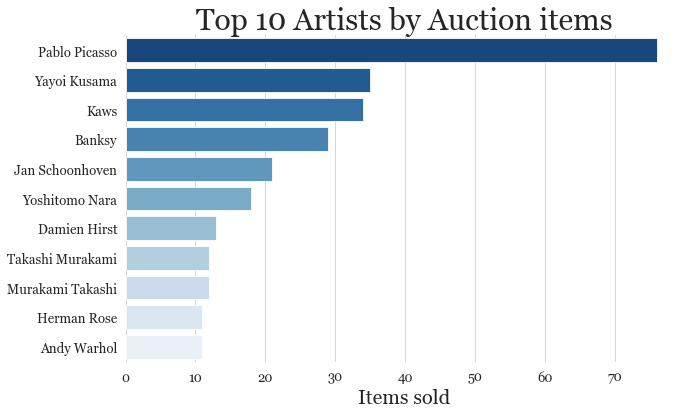

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='paper', style='whitegrid', font='georgia', font_scale=1.5)

fig = plt.figure(figsize=(20, 6))

artist_count  = auctions['artwork_artist'].value_counts()[:11,]
plt.figure(figsize=(10,6))
sns.barplot(artist_count.values, artist_count.index, color='tomato', palette='Blues_r')
plt.title('Top 10 Artists by Auction items', fontsize=30)
plt.xlabel('Items sold', fontsize=20)
sns.despine(left = True, bottom = True)
plt.show()

In [15]:
auctions['auction_city'].value_counts()

New York     815
London       398
Hong Kong    255
Paris        125
Milan         58
Name: auction_city, dtype: int64

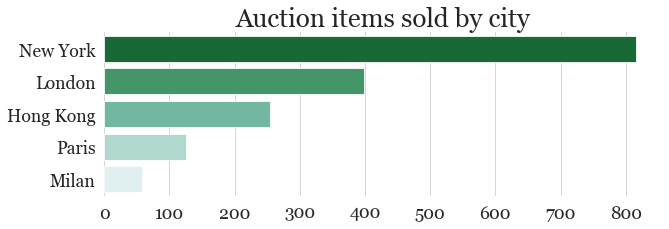

In [98]:
sns.set(context='paper', style='whitegrid', font='georgia', font_scale=2)

city_count  = auctions['auction_city'].value_counts()
plt.figure(figsize=(10,3))
sns.barplot(city_count.values, city_count.index, color='palegreen', palette='BuGn_r')
plt.title('Auction items sold by city', fontsize=26)
plt.xlabel('', fontsize=15)
sns.despine(left = True, bottom = True)
plt.show()

In [17]:
auctions["percentage_above_estimate"] = auctions["price"]/((auctions["estimate_high"] + auctions["estimate_low"])/2)

## Is there seasonality in sales?

Below we plot total auction sales by months, the bars represent total auction sales in each of the city across 2018 to 2020.

In [18]:
# time-series plot
# plt.plot(auctions["index"].dt.year,auctions["price"],c="blue",label="year")
# plt.plot(women_degrees["Year"],100-women_degrees["Biology"],c="green",label="Men")
# plt.title("Percentage of Biology Degrees Awarded By Gender")
# plt.legend(loc="upper right")
# plt.tick_params(bottom="off",top="off",left="off",right="oaff")
# plt.show()


auctions.index
auctions['year'] = auctions.index.year
auctions['month'] = auctions.index.month
auctions['day'] = auctions.index.day

grouped_by_month = auctions.groupby('month')
sales_by_month = grouped_by_month['price']
print(sales_by_month.describe())

       count   mean    std    min    25%    50%    75%       max
month                                                           
2        128 36,641 45,524  1,000  7,750 25,000 46,250   266,000
3        190 20,363 26,948  1,000  5,000 12,000 25,000   200,000
4        442 24,156 78,866  1,000  3,000  7,500 19,000 1,372,000
5         42  5,857  7,782  1,000  2,250  3,000  4,750    40,000
6         85  8,965 10,833  1,000  3,000  5,000 12,000    65,000
7        106 14,906 20,588  1,000  3,000  6,500 20,000   150,000
8         24 15,958 19,588  2,000  4,000 10,000 19,000    92,000
9         25 51,360 62,482 13,000 19,000 25,000 40,000   266,000
10       291 15,357 21,440  1,000  4,000  8,000 18,500   200,000
11       151 15,762 18,315  1,000  3,000  7,000 25,000   100,000
12       167 24,569 34,232  1,000  4,000 10,000 31,500   250,000


              count   mean    std   min   25%    50%    75%       max
auction_city                                                         
Hong Kong       255 11,310 15,539 1,000 3,000  6,000 12,000   120,000
London          398 36,389 86,369 1,000 5,000 15,000 40,000 1,372,000
Milan            58  8,259  8,723 1,000 3,000  5,000 12,000    38,000
New York        815 17,939 25,389 1,000 3,000  9,000 23,000   250,000
Paris           125 15,816 27,138 1,000 4,000  6,000 16,000   243,000


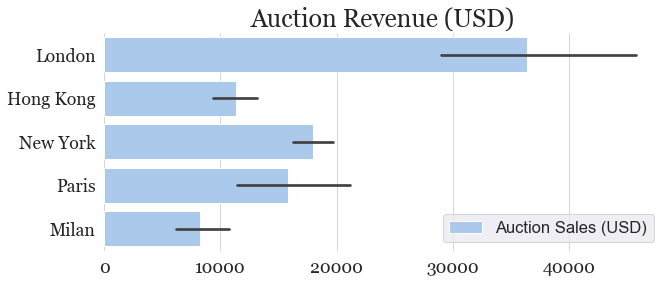

In [72]:
grouped_by_city = auctions.groupby('auction_city')
price_by_city = grouped_by_city['price']
print(price_by_city.describe())

f, ax = plt.subplots(figsize = (10,4))
sns.set(palette='pastel', font_scale=1.5)
sns.barplot(x = 'price', y = 'auction_city', data = auctions,
            label = 'Auction Sales (USD)', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.title('Auction Revenue (USD)', fontsize=25)
plt.show()

# sns.barplot(x='price', y='auction_city', data=auctions);
# sns.despine(left = True, bottom = True)

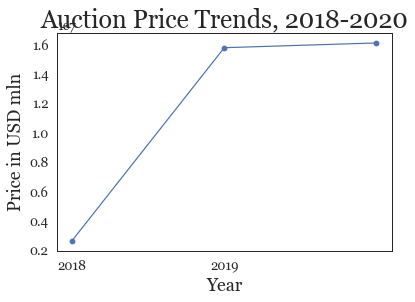

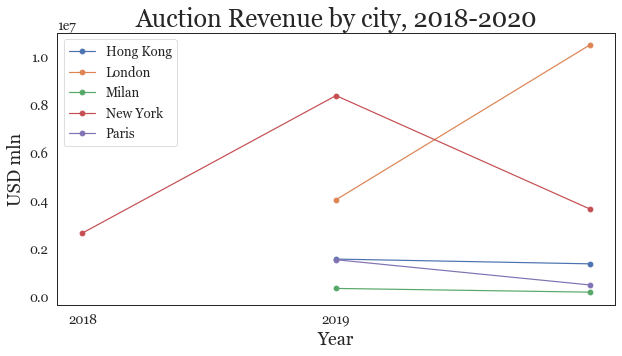

In [76]:
sns.set(context='paper', style='white', font='georgia', font_scale=1.5)

grouped_by_year = auctions.groupby('year')
price_by_year = grouped_by_year['price'].sum()
auctions['year_month']=pd.to_datetime(auctions[['year','month','day']])

# plot data, aggregated by year, totaled by price
plt.plot(price_by_year.index, price_by_year.values, marker='o')
plt.xticks(np.arange(2018, 2020,1))
plt.title("Auction Price Trends, 2018-2020", fontsize=25)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Price in USD mln", fontsize=18)

# plot data, aggregated by year, city, totaled by price
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xticks(range(2018, 2020, 1))
auctions.groupby(['year','auction_city'])['price'].sum().unstack().plot(ax=ax, marker='o')
plt.title("Auction Revenue by city, 2018-2020", fontsize=25)
plt.xlabel("Year", fontsize=18)
plt.ylabel("USD mln", fontsize=18)
plt.legend(loc='upper left')

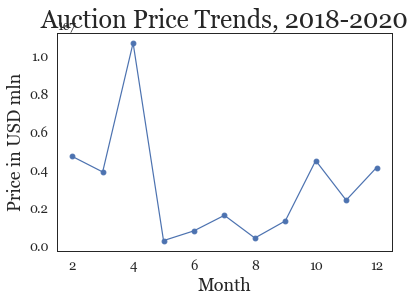

In [77]:
sns.set(context='paper', style='white', font='georgia', font_scale=1.5)

grouped_by_month = auctions.groupby('month')
price_by_month = grouped_by_month['price'].sum()

plt.plot(price_by_month.index, price_by_month.values, marker='o')
plt.xlabel("Month", fontsize=18)
plt.ylabel("Price in USD mln", fontsize=18)
plt.title("Auction Price Trends, 2018-2020", fontsize=25)
plt.show()

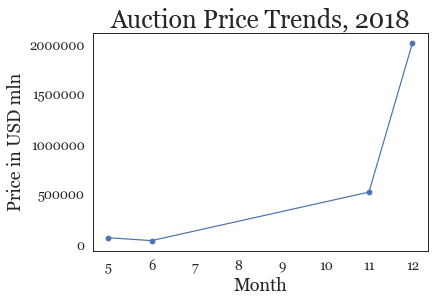

In [78]:

grouped_by_month = auctions[auctions['year'] == 2018].groupby('month')
price_by_month = grouped_by_month['price'].sum()

plt.plot(price_by_month.index, price_by_month.values, marker='o')
plt.xlabel("Month", fontsize=18)
plt.ylabel("Price in USD mln", fontsize=18)
plt.title("Auction Price Trends, 2018", fontsize=25)
plt.show()

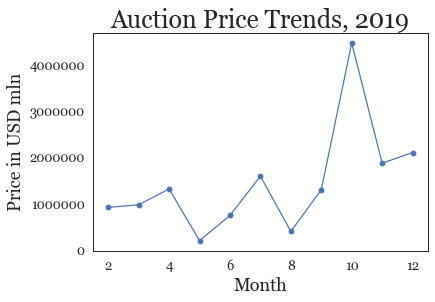

In [79]:
grouped_by_month = auctions[auctions['year'] == 2019].groupby('month')
price_by_month = grouped_by_month['price'].sum()

plt.plot(price_by_month.index, price_by_month.values, marker='o')
plt.xlabel("Month", fontsize=18)
plt.ylabel("Price in USD mln", fontsize=18)
plt.title("Auction Price Trends, 2019", fontsize=25)
plt.show()

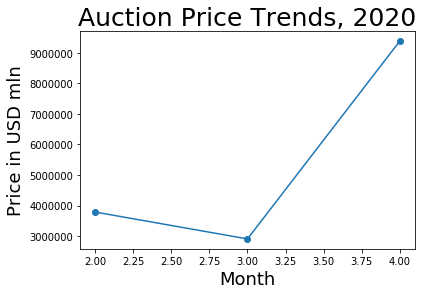

In [24]:
grouped_by_month = auctions[auctions['year'] == 2020].groupby('month')
price_by_month = grouped_by_month['price'].sum()

plt.plot(price_by_month.index, price_by_month.values, marker='o')
plt.xlabel("Month", fontsize=18)
plt.ylabel("Price in USD mln", fontsize=18)
plt.title("Auction Price Trends, 2020", fontsize=25)
plt.show()

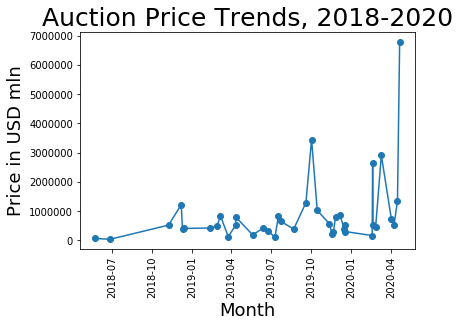

In [25]:
auctions['year_month']=pd.to_datetime(auctions[['year','month','day']])
grouped_by_year_month = auctions.groupby('year_month')
price_by_year_month = grouped_by_year_month['price'].sum()

plt.plot(price_by_year_month.index, price_by_year_month.values, marker='o')
plt.xticks(rotation=90)
plt.xlabel("Month", fontsize=18)
plt.ylabel("Price in USD mln", fontsize=18)
plt.title("Auction Price Trends, 2018-2020", fontsize=25)
plt.show()

In [26]:
auctions[['year', 'month', 'day', 'year_month']]

year  month  day year_month
auction_date_time                                     
2020-04-21 13:00:00+00:00  2020      4   21 2020-04-21
2020-04-21 13:00:00+00:00  2020      4   21 2020-04-21
2020-04-21 13:00:00+00:00  2020      4   21 2020-04-21
2020-04-21 13:00:00+00:00  2020      4   21 2020-04-21
2020-04-21 13:00:00+00:00  2020      4   21 2020-04-21
...                         ...    ...  ...        ...
2018-05-24 19:00:00+00:00  2018      5   24 2018-05-24
2018-05-24 19:00:00+00:00  2018      5   24 2018-05-24
2018-05-24 19:00:00+00:00  2018      5   24 2018-05-24
2018-05-24 19:00:00+00:00  2018      5   24 2018-05-24
2018-05-24 19:00:00+00:00  2018      5   24 2018-05-24

[1651 rows x 4 columns]

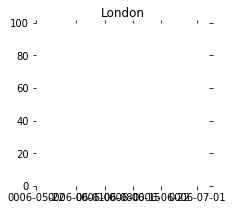

In [27]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
auction_cities = ['London', 'Hong Kong', 'Paris', 'Milan', 'New York']

fig = plt.figure(figsize=(18, 3))

ax = fig.add_subplot(1,5, 1)
ax.plot(auctions['year_month'], auctions['auction_city'] == 'London', c=cb_dark_blue, label='Auction Sales', linewidth=3)
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
ax.set_xlim(1968, 2011)
ax.set_ylim(0,100)
ax.set_title('London')
ax.tick_params(bottom="off", top="off", left="off", right="off")
    
#     if sp == 0:
#         ax.text(2005, 87, 'Men')
#     elif sp == 5:
#         ax.text(2005, 62, 'Men')
plt.show()

Text(0.5, 1.0, 'Times sold above estimates (USD)')

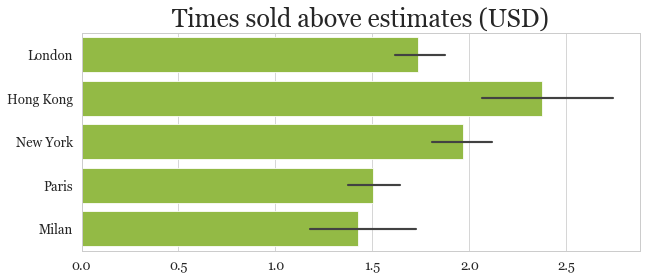

In [100]:
sns.set(context='paper', style='whitegrid', font='georgia', font_scale=1.5)

auctions["percentage_above_estimate"] = auctions["price"]/((auctions["estimate_high"] + auctions["estimate_low"])/2)
plt.figure(figsize=(10,4))
sns.barplot(x='percentage_above_estimate', y='auction_city', data=auctions, color='yellowgreen');
plt.ylabel('', fontsize=20)
plt.xlabel('', fontsize=20)
plt.title('Times sold above estimates (USD)', fontsize=25)

Text(0.5, 1, 'Auction Revenue (USD)')

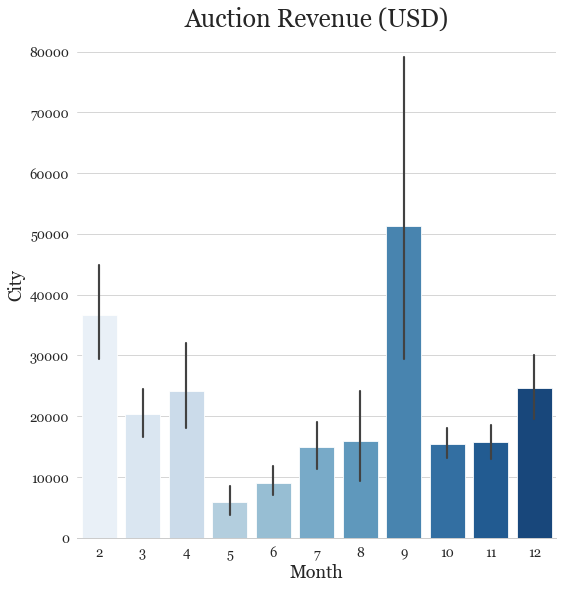

In [102]:
# sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="month", y="price", data=auctions,
                height=8, kind="bar", palette="Blues")
g.despine(left=True)
g.set_ylabels("Auction Sales (USD)")
plt.ylabel('City', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.title('Auction Revenue (USD)', fontsize=25)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Correlation between number of bids and price')

<Figure size 4320x288 with 0 Axes>

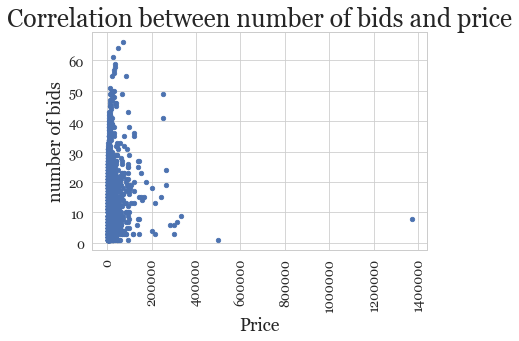

In [112]:
plt.figure(figsize=(60,4))
auctions.plot.scatter('price', 'num_bids')
plt.xticks(rotation=90)
plt.xlabel("Price", fontsize=18)
plt.ylabel("number of bids", fontsize=18)
plt.title('Correlation between number of bids and price', fontsize=25)



In [31]:
grouped_by_city = auctions.groupby('auction_city')
# price_by_city = grouped_by_city['price'].sum()
grouped_by_city['auction_city'].value_counts()
print(price_by_city.describe())

              count   mean    std   min   25%    50%    75%       max
auction_city                                                         
Hong Kong       255 11,310 15,539 1,000 3,000  6,000 12,000   120,000
London          398 36,389 86,369 1,000 5,000 15,000 40,000 1,372,000
Milan            58  8,259  8,723 1,000 3,000  5,000 12,000    38,000
New York        815 17,939 25,389 1,000 3,000  9,000 23,000   250,000
Paris           125 15,816 27,138 1,000 4,000  6,000 16,000   243,000


In [32]:
bids_by_city = grouped_city['num_bids']
print(bids_by_city.describe())

NameError: name 'grouped_city' is not defined

In [ ]:
auctions_by_artist = auctions.groupby('artwork_artist')['price'].mean().sort_values(ascending=False)
# auctions_by_artist[:10].plot.bar(x='artwork_artist', y='price', legend=True)
# auctions.describe(include='all')

pv_price_artist = auctions.pivot_table('price', 'artwork_artist')
pv_price_artist.plot(kind='barh', title='Auction Prices by Artist', xlim=(0,10), ylim=(0,20), legend=False)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

scatter_matrix(auctions[['artwork_artist', 'price']], figsize=(10,10))

In [ ]:
auctions.groupby('artwork_artist')['price'].mean().sort_values(ascending=False)

In [ ]:
print(auctions["price"].describe())

## WordCloud - _just for fun_



### Guess what's the most common word in contemporary/modern art titles?
.
.
.
.
.
.
.
.
.

### Any guesses?

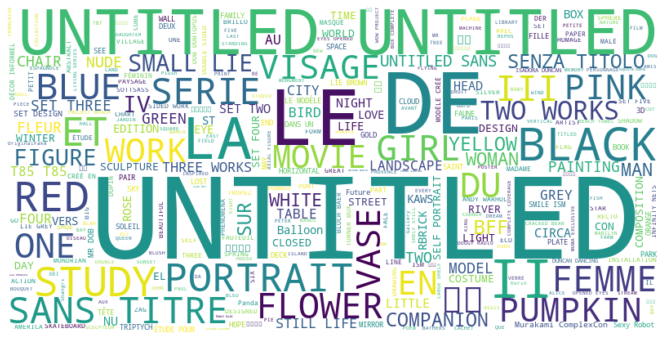

In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(auctions['artwork_title_1']))

# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()